In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
times_train = filter(lambda x: x[-3:] == 'txt', os.listdir('data_times_merged/train'))
times_train = ['data_times_merged/train/' + file for file in times_train]
times_test = filter(lambda x: x[-3:] == 'txt', os.listdir('data_times_merged/test'))
times_test = ['data_times_merged/test/' + file for file in times_test]
len(times_train), len(times_test)

(500, 396)

In [15]:
def get_box_df(path):
    try:
        df = pd.read_csv(path, sep=' ')
    except Exception:
        return pd.DataFrame(columns=['Class', 'x_center', 'y_center', 'width', 'height', 'path'])
    df.columns = ['Class', 'x_center', 'y_center', 'width', 'height']
    df['path'] = path
    return df
df_times = pd.concat(get_box_df(path) for path in times_train + times_test)
df_times.head()

,Class,x_center,y_center,width,height,path
0,0,0.756640,0.590975,0.206480,0.144478,data_times_merged/train/1.txt
1,0,0.310541,0.552692,0.184940,0.124377,data_times_merged/train/1.txt
0,1,0.214062,0.589352,0.076042,0.069444,data_times_merged/train/100.txt
1,1,0.378385,0.594444,0.093229,0.096296,data_times_merged/train/100.txt
2,0,0.560937,0.574537,0.184375,0.128704,data_times_merged/train/100.txt


In [16]:
df_times.shape[0]

9170

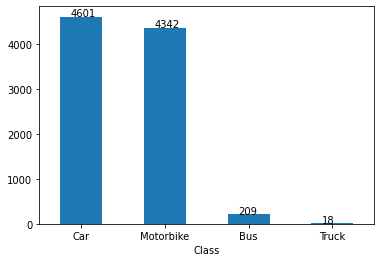

In [24]:
ax = df_times.groupby('Class').size().plot.bar()
ax.set_xticklabels(['Car', 'Motorbike', 'Bus', 'Truck'], rotation='horizontal')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.125, p.get_height() * 1.005))

(array([32., 34., 39., 52., 63., 55., 51., 36., 24., 24., 30., 36., 45.,
        55., 49., 51., 51., 49., 36., 32., 22., 13., 10.,  1.,  6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]),
 <BarContainer object of 25 artists>)

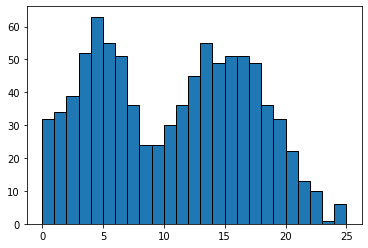

In [36]:
box_per_frame = df_times.groupby('path').size().to_list()
box_per_frame.extend([0] * 32)
plt.hist(box_per_frame, bins=25, edgecolor='k')

(0.0, 0.1)

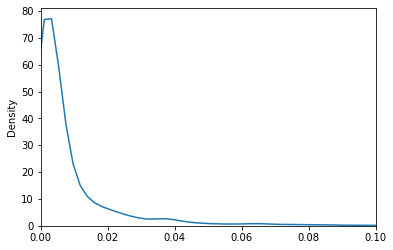

In [42]:
ax = sns.kdeplot(df_times.width * df_times.height)
ax.set_xlim(0, 0.1)

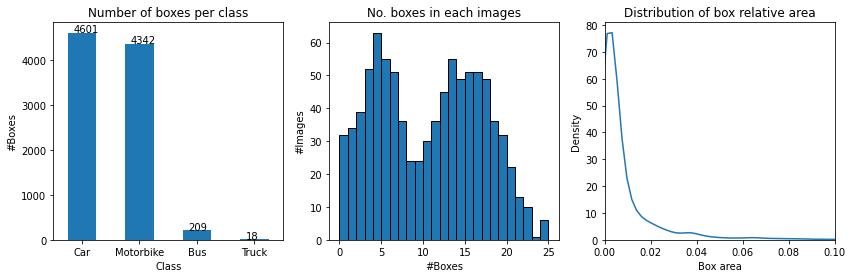

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df_times.groupby('Class').size().plot.bar(ax=ax[0])
ax[0].set_xticklabels(['Car', 'Motorbike', 'Bus', 'Truck'], rotation='horizontal')
for p in ax[0].patches:
    ax[0].annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() * 1.005))
ax[0].set_ylabel('#Boxes')
ax[0].set_title('Number of boxes per class')
    
box_per_frame = df_times.groupby('path').size().to_list()
box_per_frame.extend([0] * 32)
ax[1].hist(box_per_frame, bins=25, edgecolor='k')
ax[1].set_xlabel('#Boxes')
ax[1].set_ylabel('#Images')
ax[1].set_title('No. boxes in each images')

sns.kdeplot(df_times.width * df_times.height, ax=ax[2])
ax[2].set_xlim(0, 0.1)
ax[2].set_xlabel('Box area')
ax[2].set_title('Distribution of box relative area')
fig.savefig('times_data.png')

In [52]:
yt_train = filter(lambda x: x[-3:] == 'txt', os.listdir('truck_jpg/train'))
yt_train = ['truck_jpg/train/' + file for file in yt_train]
yt_test = filter(lambda x: x[-3:] == 'txt', os.listdir('truck_jpg/test'))
yt_test = ['truck_jpg/test/' + file for file in yt_test]
print(len(yt_train), len(yt_test))

df_yt = pd.concat(get_box_df(path) for path in yt_train + yt_test)
df_yt.head()

240 104


,Class,x_center,y_center,width,height,path
0,3,0.766602,0.502924,0.130859,0.269006,truck_jpg/train/1.txt
1,3,0.436523,0.459064,0.158203,0.309942,truck_jpg/train/1.txt
2,3,0.636719,0.478070,0.121094,0.260234,truck_jpg/train/1.txt
3,3,0.699219,0.255848,0.054688,0.114035,truck_jpg/train/1.txt
4,3,0.508789,0.350877,0.107422,0.198830,truck_jpg/train/1.txt


In [56]:
df_yt.shape

(1731, 6)

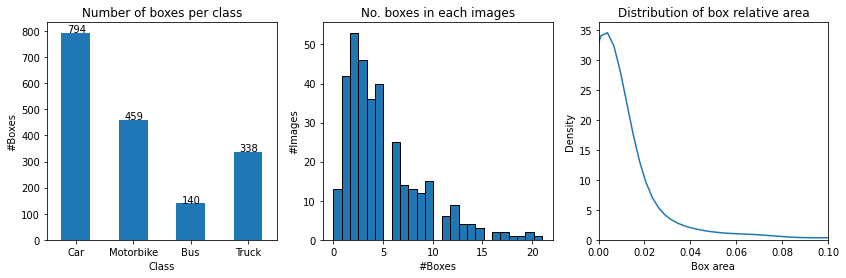

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df_yt.groupby('Class').size().plot.bar(ax=ax[0])
ax[0].set_xticklabels(['Car', 'Motorbike', 'Bus', 'Truck'], rotation='horizontal')
for p in ax[0].patches:
    ax[0].annotate(str(p.get_height()), (p.get_x() + 0.1, p.get_height() * 1.005))
ax[0].set_ylabel('#Boxes')
ax[0].set_title('Number of boxes per class')
    
box_per_frame = df_yt.groupby('path').size().to_list()
box_per_frame.extend([0] * 13)
ax[1].hist(box_per_frame, bins=25, edgecolor='k')
ax[1].set_xlabel('#Boxes')
ax[1].set_ylabel('#Images')
ax[1].set_title('No. boxes in each images')

sns.kdeplot(df_yt.width * df_yt.height, ax=ax[2])
ax[2].set_xlim(0, 0.1)
ax[2].set_xlabel('Box area')
ax[2].set_title('Distribution of box relative area')
fig.savefig('yt_data.png')